# 어텐션 메커니즘 (Attention Mechanism)
- RNN에 기반한 seq2seq 모델에는 크게 두 가지 문제가 존재
1. **하나의 고정된 크기의 벡터에 모든 정보를 압축하려고 하니까 정보 손실이 발생**
2. **RNN의 고질적인 문제인 기울기 소실(vanishing gradient) 문제가 존재**

- 결국 이는 기계 번역 분야에서 입력 문장이 길면 번역 품질이 떨어지는 현상으로 나타남
- 이를 위한 대안으로 입력 시퀀스가 길어지면 출력 시퀀스의 정확도가 떨어지는 것을 보정해주기 위한 등장한 기법인 어텐션(attention)이 존재

<br>

## 어텐션(Attention)의 아이디어
- **어텐션의 기본 아이디어는 디코더에서 출력 단어를 예측하는 매 시점(time step)마다, 인코더에서의 전체 입력 문장을 다시 한 번 참고**
- **단, 전체 입력 문장을 전부 다 동일한 비율로 참고하는 것이 아니라, 해당 시점에서 예측해야할 단어와 연관이 있는 입력 단어 부분을 좀 더 집중(attention)**

<br>

## 어텐션 함수(Attention Function)
- 파이썬의 딕셔너리 자료형은 키(Key)와 값(Value)이라는 두 개의 쌍으로 구성


In [1]:
dict = {"2017" : "Transformer", "2018" : "BERT"}


- 위의 자료형에서 2017은 키에 해당되며, Transformer는 2017의 키와 맵핑되는 값에 해당
- 그와 마찬가지로 2018은 키에 해당되며, BERT는 2018이라는 키와 맵핑되는 값에 해당

In [2]:
print(dict["2017"]) #2017이라는 키에 해당되는 값을 출력

Transformer


In [3]:
print(dict["2018"])  #2018이라는 키에 해당되는 값을 출력

BERT


<br>

#### Key-Value 자료형에 대한 어텐션 함수
- 어텐션을 함수로 표현

$$Attention(Q, K, V) = Attention Value$$


<img src='https://wikidocs.net/images/page/22893/%EC%BF%BC%EB%A6%AC.PNG'>

- **어텐션 함수는 주어진 '쿼리(Query)'에 대해서 모든 '키(Key)'와의 유사도를 각각 구함**
  
  $→$ **구해낸 이 유사도를 키와 맵핑되어있는 각각의 '값(Value)'에 반영**
  
  $→$ **유사도가 반영된 '값(Value)'을 모두 더해서 리턴 = 어텐션 값(Attention Value)**

<br>

- **seq2seq + 어텐션 모델에서 Q, K, V에 해당되는 각각의 Query, Keys, Values**

```
Q = Query : t 시점의 디코더 셀에서의 은닉 상태
K = Keys : 모든 시점의 인코더 셀의 은닉 상태들
V = Values : 모든 시점의 인코더 셀의 은닉 상태들
```

<br>

## 닷-프로덕트 어텐션 (Dot-Product Attention)
- seq2seq에서 사용되는 어텐션 중에서 닷-프로덕트 어텐션과 다른 어텐션의 차이는 주로 중간 수식의 차이 (메커니즘 자체는 거의 유사)

<br>

<img src = 'https://wikidocs.net/images/page/22893/dotproductattention1_final.PNG'>

- 위 그림은 디코더의 세번째 LSTM 셀에서 출력 단어를 예측할 때, 어텐션 메커니즘을 사용하는 형태
- **디코더의 첫번째, 두번째 LSTM 셀은 이미 어텐션 메커니즘을 통해 je와 suis를 예측하는 과정을 거쳤다고 가정**
- **디코더의 세번째 LSTM 셀은 출력 단어를 예측하기 위해서 인코더의 모든 입력 단어들의 정보를 다시 한번 참고**
  - **인코더의 소프트맥스 함수를 통해 나온 결과값은 I, am, a, student 단어 각각이 출력 단어를 예측할 때 얼마나 도움이 되는지의 정도를 수치화한 값**
  - **빨간 직사각형의 크기로 소프트맥스 함수의 결과값의 크기를 표현하였으며, 직사각형의 크기가 클 수록 도움이 되는 정도의 크기가 큼**
  - **각 입력 단어가 디코더의 예측에 도움이 되는 정도가 수치화하여 측정되면, 이를 하나의 정보로 담아서 디코더로 전송 (초록색 삼각형)**  
  - **결과적으로, 디코더는 출력 단어를 더 정확하게 예측할 확률이 증가**

<br>

### 1) 어텐션 스코어 (Attention Score) 계산

<img src = 'https://wikidocs.net/images/page/22893/dotproductattention2_final.PNG'>


- **인코더의 시점(time step)을 각각 1, 2, ... N이라고 하였을 때 인코더의 은닉 상태(hidden state)를 각각 $h_1, h_2, \dots, h_N$라고 하고,**

  **디코더의 현재 시점(time step) t에서의 디코더의 은닉 상태(hidden state)를 $s_t$라고 가정,**

  **인코더의 은닉 상태와 디코더의 은닉 상태의 차원이 같다고 가정**
  
  (위의 그림의 경우에는 인코더의 은닉 상태와 디코더의 은닉 상태가 동일하게 차원이 4)

- **인코더-디코더에서 시점 t에서 출력 단어를 예측하기 위해서 디코더의 셀은 두 개의 입력값을 필요**

  $→$ **이전 시점인 t-1의 은닉 상태와, 이전 시점 t-1에 나온 출력 단어**

- **어텐션 메커니즘에서는 출력 단어 예측에 어텐션 값(Attention Value)이라는 또 다른 값을 필요**
  
  $\rightarrow$ **t번째 단어를 예측하기 위한 어텐션 값을 $a_t$이라고 정의**


<br>

#### 어텐션 스코어
- 어텐션 값을 구하기 위해서는 어텐션 스코어(Attention Score)의 계산이 필요
- **어텐션 스코어란 현재 디코더의 시점 t에서 단어를 예측하기 위해,**

  **인코더의 모든 은닉 상태 각각이, 디코더의 현 시점의 은닉 상태 $s_t$와 얼마나 유사한지를 판단하는 스코어값**

- **닷-프로덕트 어텐션에서는 이 스코어 값을 구하기 위해 $s_t$를 전치(transpose)하고, 각 은닉 상태와 내적(dot product)을 수행**

  $→$ 즉, 모든 어텐션 스코어 값은 스칼라
  
  $→$ 예를 들어 $s_t$와 인코더의 i번째 은닉 상태의 어텐션 스코어의 계산 방법은 아래와 같음


<img src = 'https://wikidocs.net/images/page/22893/i%EB%B2%88%EC%A7%B8%EC%96%B4%ED%85%90%EC%85%98%EC%8A%A4%EC%BD%94%EC%96%B4_final.PNG'>

- 어텐션 스코어 함수의 정의

$$score(s_{t},\ h_{i}) = s_{t}^Th_{i}$$


- $s_t$와 인코더의 모든 은닉 상태의 어텐션 스코어의 모음값을 $e^t$라고 정의할 때, $e^t$의 수식

$$e^{t}=[s_{t}^Th_{1},...,s_{t}^Th_{N}]$$

<br>

### 2) 소프트맥스(softmax) 함수를 통해 어텐션 분포(Attention Distribution) 계산

<img src='https://wikidocs.net/images/page/22893/dotproductattention3_final.PNG'>

- **$e^t$에 소프트맥스 함수를 적용하여, 모든 값을 합하면 1이 되는 확률 분포를 계산**

  $→$ **어텐션 분포(Attention Distribution), 각각의 값은 어텐션 가중치(Attention Weight)**
  - 예를 들어 소프트맥스 함수를 적용하여 얻은 출력값인 I, am, a, student의 어텐션 가중치를 각각 0.1, 0.4, 0.1, 0.4라고 할 때 이들의 합은 1
  - 위의 그림은 각 인코더의 은닉 상태에서의 어텐션 가중치의 크기를 직사각형의 크기를 통해 시각화

    $\rightarrow$ 즉, 어텐션 가중치가 클수록 직사각형이 큼

- **디코더의 시점 t에서의 어텐션 가중치의 모음값인 어텐션 분포를 $\alpha^t$이라고 할 때**

$$α^{t} = softmax(e^{t})$$

<br>

### 3) 각 인코더의 어텐션 가중치와 은닉 상태를 가중합하여 어텐션 값(Attention Value)을 계산

<img src='https://wikidocs.net/images/page/22893/dotproductattention4_final.PNG'>

- **어텐션의 최종 결과값을 얻기 위해서 각 인코더의 은닉 상태와 어텐션 가중치값들을 곱하고, 최종적으로 모두 더함**
  
  $\rightarrow$ 가중합(Weighted Sum)을 진행
- **어텐션의 최종 결과. 즉, 어텐션 함수의 출력값인 어텐션 값(Attention Value) $a_t$**

$$a_{t}=\sum_{i=1}^{N} α_{i}^{t}h_{i}$$


- **이러한 어텐션 값 $a_t$은 종종 인코더의 문맥을 포함하고 있다고하여, 컨텍스트 벡터(context vector)라고도 불림**
  - **앞서 배운 가장 기본적인 seq2seq에서는, 인코더의 마지막 은닉 상태를 컨텍스트 벡터라고 부르는 것과 대조**


<br>

### 4) 어텐션 값과 디코더의 t 시점의 은닉 상태를 연결 (Concatenate)

<img src='https://wikidocs.net/images/page/22893/dotproductattention5_final_final.PNG'>

- **어텐션 값이 구해지면 어텐션 메커니즘은 $a_t$를 $s_t$와 결합(concatenate)하여 하나의 벡터 ($v_t$)로 만드는 작업을 수행**
- **$v_t$를 $\hat{y}$ 예측 연산의 입력으로 사용함으로서 인코더로부터 얻은 정보를 활용 $\hat{y}$를 좀 더 잘 예측**
  
  $\rightarrow$ **어텐션 메커니즘의 핵심**


<br>

### 5) 출력층 연산의 입력이 되는 $\tilde{{s}}_{t}$를 계산

<img src='https://wikidocs.net/images/page/22893/st.PNG'>

- 논문에서는 $v_t$를 바로 출력층으로 보내기 전에 신경망 연산을 한 번 더 추가
- 가중치 행렬과 곱한 후에 하이퍼볼릭탄젠트 함수를 지나도록 하여 출력층 연산을 위한 새로운 벡터인 $\tilde{s_t}$를 계산
  - 어텐션 메커니즘을 사용하지 않는 seq2seq에서는 출력층의 입력이 t시점의 은닉 상태인 $s_t$였던 반면, 어텐션 메커니즘에서는 출력층의 입력이 $\tilde{s_t}$가 되는 셈

- $\mathbf{W}_e$는 학습 가능한 가중치 행렬, $b_c$는 편향일 때

$$\tilde{s}_{t} = \tanh(\mathbf{W_{c}}[{a}_t;{s}_t] + b_{c})$$


<br>

### 6) $\tilde{s_t}$를 출력층의 입력으로 사용
- $\tilde{s_t}$를 출력층의 입력으로 사용하여 예측 벡터를 계산


$$\widehat{y}_t = \text{Softmax}\left( W_y\tilde{s}_t + b_y \right)$$

<br>

## 다양한 종류의 어텐션 (Attention)
- **seq2seq + 어텐션(attention) 모델에 쓰일 수 있는 다양한 어텐션 종류가 있지만, 닷-프로덕트 어텐션과 다른 어텐션들의 차이는 중간 수식의 차이**
- **여기서 말하는 중간 수식은 어텐션 스코어 함수**
  - 닷-프로덕트는 어텐션 스코어를 구하는 방법이 내적

- 어텐션 스코어를 구하는 방법은 여러가지가 제시되어있으며, 현재 제시된 여러 종류의 어텐션 스코어 함수는 다음과 같음

<br>

<table>
<thead>
<tr>
<th>이름</th>
<th>스코어 함수</th>
<th>Defined by</th>
</tr>
</thead>
<tbody>
<tr>
<td>$dot$</td>
<td>$score(s_{t},\ h_{i}) = s^{T}_{t}h_{i}$</td>
<td>Luong et al. (2015)</td>
</tr>
<tr>
<td>$scaled\ dot$</td>
<td>$$score(s_{t},\ h_{i}) = \frac{s^{T}_{t}h_{i}}{\sqrt{n}}$$</td>
<td>Vaswani et al. (2017)</td>
</tr>
<tr>
<td>$general$</td>
<td>$score(s_{t},\ h_{i}) = s^{T}_{t}W_{a}h_{i}$ // 단, $W_{a}$는 학습 가능한 가중치 행렬</td>
<td>Luong et al. (2015)</td>
</tr>
<tr>
<td>$concat$</td>
<td>$score(s_{t},\ h_{i}) = W_{a}^{T}\ tanh(W_{b}[s_{t};h_{i}]), score(s_{t},\  h_{i}) = W_{a}^{T}\ tanh(W_{b}s_{t}+W_{c} h_{i})$</td>
<td>Bahdanau et al. (2015)</td>
</tr>
<tr>
<td>$location-base$</td>
<td>$α_{t} = softmax(W_{a}s_{t})$ // $α_{t}$ 산출 시에 $s_{t}$만 사용하는 방법.</td>
<td>Luong et al. (2015)</td>
</tr>
</tbody>
</table>

<br>

- 위에서 $s_{t}$는 Query, $h_{i}$는 Keys, $W_{a}$와 $W_{b}$는 학습 가능한 가중치 행렬

* 어텐션은 처음에는 RNN 기반의 seq2seq의 성능을 보정하기 위한 목적으로 소개되었지만, 현재에 이르러서는 어텐션 스스로가 기존의 seq2seq를 대체하는 방법이 되어가고 있음



<br>

<hr>

## 바다나우 어텐션(Bahdanau Attention)

<br>

### 바다나우 어텐션 함수(Bahdanau Attention Function)
- 어텐션 메커니즘을 함수 Attention()으로 정의하였을 때, 바다나우 어텐션 함수의 입, 출력은 다음과 같이 정의


$$Attention(Q, K, V) = Attention Value$$

```
t = 어텐션 메커니즘이 수행되는 디코더 셀의 현재 시점을 의미.

Q = Query : t-1 시점의 디코더 셀에서의 은닉 상태
K = Keys : 모든 시점의 인코더 셀의 은닉 상태들
V = Values : 모든 시점의 인코더 셀의 은닉 상태들
```

- **어텐션 함수의 Query가 디코더 셀의 t 시점의 은닉 상태가 아닌, t-1 시점의 은닉 상태**



<br>

### 바다나우 어텐션(Bahdanau Attention)

<br>

### 1) 어텐션 스코어(Attention Score) 계산

<img src='https://wikidocs.net/images/page/73161/%EB%B0%94%EB%8B%A4%EB%82%98%EC%9A%B0%EC%96%B4%ED%85%90%EC%85%981.PNG'>

- **인코더의 시점(time step)을 각각 1, 2, ... N이라고 할 때, 인코더의 은닉 상태(hidden state)는 각각 $h_1, h_2, \dots, h_n$라고 가정**

 **디코더의 현재 시점(time step) t에서의 디코더의 은닉 상태(hidden state)를 $s_t$라고 가정**
  
  **또한 인코더의 은닉 상태와 디코더의 은닉 상태의 차원이 같다고 가정**

- 위의 그림의 경우 인코더의 은닉 상태와 디코더의 은닉 상태가 동일하게 차원이 4

<br>

- **닷-프로덕트 어텐션에서는 Query로 디코더의 t 시점의 은닉 상태를 사용한 것과는 달리, 바다나우 어텐션에서는 t-1 시점의 은닉 상태 $s_{t-1}$를 사용**
- 바다나우 어텐션의 어텐션 스코어 함수. 즉, $s_{t-1}$과 인코더의 i번째 은닉 상태의 어텐션 스코어 계산

$$score(s_{t-1},\ h_{i}) = W_{a}^{T}\ tanh(W_{b}s_{t-1}+W_{c}h_{i})$$(단, $W_{a}, W_{b}, W_{c}$는 학습 가능한 가중치 행렬)

- $s_{t-1}$와 $h_1, h_2, h_3, h_4$의 어텐션 스코어를 각각 구해야하므로,

  병렬 연산을 위해 $h_1, h_2, h_3, h_4$를 하나의 행렬 $H$로 둔다면, 수식은 다음과 같이 변경

$$score(s_{t-1},\ H) = W_{a}^{T}\ tanh(W_{b}s_{t-1}+W_{c}H)$$

<br>

*$W_{b}s_{t-1}$와 $W_{c}H$*

<img src='https://wikidocs.net/images/page/73161/%EB%B0%94%EB%8B%A4%EB%82%98%EC%9A%B0%EC%96%B4%ED%85%90%EC%85%982.PNG'>

*이들을 더한 후, 하이퍼볼릭탄젠트 함수를 지남*

<img src='https://wikidocs.net/images/page/73161/%EB%B0%94%EB%8B%A4%EB%82%98%EC%9A%B0%EC%96%B4%ED%85%90%EC%85%983.PNG'>

- 위 그림으로 진행된 연산의 수식

$$tanh(W_{b}s_{t-1}+W_{c}H)$$

<br>

*$W^T_a$와 곱하여 $s_{t-1}$와 $h_{1}, h_{2}, h_{3}, h_{4}$의 유사도가 기록된 어텐션 스코어 벡터 $e^t$를 계산*



<img src='https://wikidocs.net/images/page/73161/%EB%B0%94%EB%8B%A4%EB%82%98%EC%9A%B0%EC%96%B4%ED%85%90%EC%85%984.PNG'>


$$e^{t} = W_{a}^{T}\ tanh(W_{b}s_{t-1}+W_{c}H)$$

<br>

### 2) 소프트맥스(softmax) 함수를 통해 어텐션 분포(Attention Distribution) 계산

<img src='https://wikidocs.net/images/page/73161/%EC%96%B4%ED%85%90%EC%85%98%EB%94%94%EC%8A%A4%ED%8A%B8%EB%A6%AC%EB%B7%B0%EC%85%98.PNG'>

- $e^t$에 소프트맥스 함수를 적용하여, 모든 값을 합하면 1이 되는 확률 분포를 계산

  $\rightarrow$ 어텐션 분포(Attention Distribution), 각각의 값은 어텐션 가중치(Attention Weight)


<br>

### 3) 각 인코더의 어텐션 가중치와 은닉 상태를 가중합하여 어텐션 값(Attention Value) 계산

<img src='https://wikidocs.net/images/page/73161/%EC%BB%A8%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%B2%A1%ED%84%B0.PNG'>

- **어텐션의 최종 결과값을 얻기 위해서 각 인코더의 은닉 상태와 어텐션 가중치값들을 곱하고, 최종적으로 모두 더함**
  
  $\rightarrow$ 가중합(Weighted Sum)을 진행

- **이 벡터는 인코더의 문맥을 포함하고 있다고하여, 컨텍스트 벡터(context vector)라고 부름**



<br>

### 4) 컨텍스트 벡터로부터 $s_t$ 계산
- 기존의 LSTM이 $s_t$를 구할 때, 기존의 LSTM은 이전 시점의 셀로부터 전달받은 은닉 상태 $s_{t-1}$와 현재 시점의 입력 $x_t$를 가지고 연산
  
  (아래의 LSTM은 seq2seq의 디코더이며 현재 시점의 입력 $x_t$는 임베딩된 단어 벡터)



<img src='https://wikidocs.net/images/page/73161/LSTM.PNG'>

- **아래의 그림의 바다나우 어텐션 메커니즘에서는, 컨텍스트 벡터와 현재 시점의 입력인 단어의 임베딩 벡터를 연결(concatenate)하고, 현재 시점의 새로운 입력으로 사용**
  
  $\rightarrow$ 이전 시점의 셀로부터 전달받은 은닉 상태 $s_{t-1}$와 현재 시점의 새로운 입력으로부터 $s_t$를 계산
  
  $→$ **기존의 LSTM이 임베딩된 단어 벡터를 입력으로 하는 반면,**
  
    **바다나우 어텐션 메커니즘에서는 컨텍스트 벡터와 임베딩된 단어 벡터를 연결(concatenate)하여 입력으로 사용**



<img src='https://wikidocs.net/images/page/73161/%EB%B0%94%EB%8B%A4%EB%82%98%EC%9A%B0%EC%96%B4%ED%85%90%EC%85%985.PNG'>

- **이후에는 어텐션 메커니즘을 사용하지 않는 경우와 동일**
  
  **$s_t$는 출력층으로 전달되어 현재 시점의 예측값을 계산**



<br>

## 양방향 LSTM과 어텐션 메커니즘(BiLSTM with Attention mechanism)
- 단뱡항 LSTM으로 텍스트 분류를 수행할 수도 있지만 때로는 양방향 LSTM을 사용하는 것이 더 강력
  
  여기에 추가적으로 어텐션 메커니즘을 사용할 수도 있음.
- 양방향 LSTM과 어텐션 메커니즘으로 IMDB 리뷰 감성 분류

<br>

### 텍스트 분류에서의 어텐션 메커니즘
- **RNN의 마지막 은닉 상태는 예측을 위해 사용되지만, RNN의 마지막 은닉 상태는 몇 가지 유용한 정보들을 손실한 상태**
  
  $\rightarrow$ **RNN이 time step을 지나며 손실했던 정보들을 다시 참고**

  $→$ **다시 말해 RNN의 모든 은닉 상태들을 다시 한 번 참고**

<br>



#### IMDB 리뷰 데이터 전처리

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

- 최대 단어 개수를 10,000으로 제한
- 훈련 데이터와 이에 대한 레이블이 각각 X_train, y_train에 테스트 데이터와 이에 대한 레이블이 각각 X_test, y_test에 저장

In [3]:
vocab_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocab_size)

17464789/17464789 [==============================] - 0s 0us/step


<br>

#### 패딩
- IMDB 리뷰 데이터는 이미 정수 인코딩이 된 상태
- 리뷰의 최대 길이와 평균 길이 확인

In [4]:
print('리뷰의 최대 길이 : {}'.format(max(len(l) for l in X_train)))
print('리뷰의 평균 길이 : {}'.format(sum(map(len, X_train))/len(X_train)))

리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


- 평균 길이보다는 조금 크게 데이터를 패딩
  $→$ 훈련용 리뷰와 테스트용 리뷰의 길이가 둘 다 500

In [5]:
max_len = 500
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

<br>

### 바다나우 어텐션 (Bahdanau Attention) 구현
- **어텐션 스코어 함수란 주어진 query와 모든 key에 대해서 유사도를 측정하는 함수**
- 닷 프로덕트 어텐션에서는 query와 key의 유사도를 구하는 방법이 내적(dot product)
  - 닷 프로덕트 어텐션의 어텐션 스코어 함수

$$score(query,\ key) = query^Tkey$$

- 바다나우 어텐션의 어텐션 스코어 함수를 사용

$$score(query,\ key) = V^Ttanh(W_{1}key + W_{2}query)$$


In [6]:
import tensorflow as tf

In [15]:
class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = Dense(units)
    self.W2 = Dense(units)
    self.V = Dense(1)

  def call(self, values, query): # 단, key와 value는 같음
    # query shape == (batch_size, hidden size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden size)
    # score 계산을 위해 뒤에서 할 덧셈을 위해서 차원을 변경
    hidden_with_time_axis = tf.expand_dims(query, 1)

    # 어텐션 스코어 계산
    # score shape == (batch_size, max_length, 1)
    score = self.V(tf.nn.tanh(
        self.W1(values) + self.W2(hidden_with_time_axis)))

    # 소프트맥스 함수를 통해 어텐션 분포 계산
    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # 각 인코더의 어텐션 가중치와 은닉 상태를 가중합 -> 어텐션 값 (컨텍스트 벡터) 계산
    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights


<br>

### 양방향 LSTM + 어텐션 메커니즘(BiLSTM with Attention Mechanism)

In [23]:
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Concatenate, Dropout
from tensorflow.keras import Input, Model
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
import os

<br>

#### 모델 설계
- 입력층과 임베딩층 설계 : 10,000개의 단어들을 128차원의 벡터로 임베딩하도록 설계

In [8]:
sequence_input = Input(shape=(max_len,), dtype='int32')
embedded_sequences = Embedding(vocab_size, 128, input_length=max_len, mask_zero = True)(sequence_input)

<br>

* 양방향 LSTM층 설계 : 두 개의 층 사용
  - 첫 번째 층에는 두 개의 층을 사용하므로 `return_sequences=True`
  - 두 번째 층에서는 상태를 리턴받아야 하므로, `return_state=True`
    - 순방향 LSTM의 은닉 상태와 셀상태를 `forward_h`, `forward_c`에 저장
    - 역방향 LSTM의 은닉 상태와 셀 상태를 `backward_h`, `backward_c`에 저장

In [9]:
# 첫 번째 층
lstm = Bidirectional(LSTM(64, dropout=0.5, return_sequences = True))(embedded_sequences)

In [10]:
# 두 번째 층
lstm, forward_h, forward_c, backward_h, backward_c = Bidirectional(LSTM(64, dropout=0.5, return_sequences=True, return_state=True))(lstm)

<br>

- 각 상태의 크기
  - 각 은닉 상태나 셀 상태의 경우에는 128차원을 가지는데, lstm의 경우에는 (500 × 128)의 크기를 가짐
  -  foward 방향과 backward 방향이 연결된 은닉 상태 벡터가 모든 시점에 대해서 존재함을 의미

In [11]:
print(lstm.shape, forward_h.shape, forward_c.shape, backward_h.shape, backward_c.shape)

(None, 500, 128) (None, 64) (None, 64) (None, 64) (None, 64)


<br>

- 양방향 LSTM을 사용할 경우에는 순방향 LSTM과 역방향 LSTM 각각 은닉 상태와 셀 상태를 가지므로,

  양방향 LSTM의 은닉 상태와 셀 상태를 사용하려면 양 방향의 LSTM의 상태들을 연결(concatenate)

In [13]:
state_h = Concatenate()([forward_h, backward_h]) # 은닉 상태
state_c = Concatenate()([forward_c, backward_c]) # 셀 상태

<br>

- 어텐션 메커니즘에서는 은닉 상태를 입력값으로 사용하여, 컨텍스트 벡터를 계산

In [16]:
attention = BahdanauAttention(64) # 가중치 크기 정의
context_vector, attention_weights = attention(lstm, state_h)

<br>

- 컨텍스트 벡터를 밀집층(dense layer)에 통과시키고,
  
  이진 분류이므로 최종 출력층에 1개의 뉴런을 배치하고,
  
  활성화 함수로 시그모이드 함수를 사용

In [17]:
dense1 = Dense(20, activation="relu")(context_vector)
dropout = Dropout(0.5)(dense1)
output = Dense(1, activation="sigmoid")(dropout)
model = Model(inputs=sequence_input, outputs=output)

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

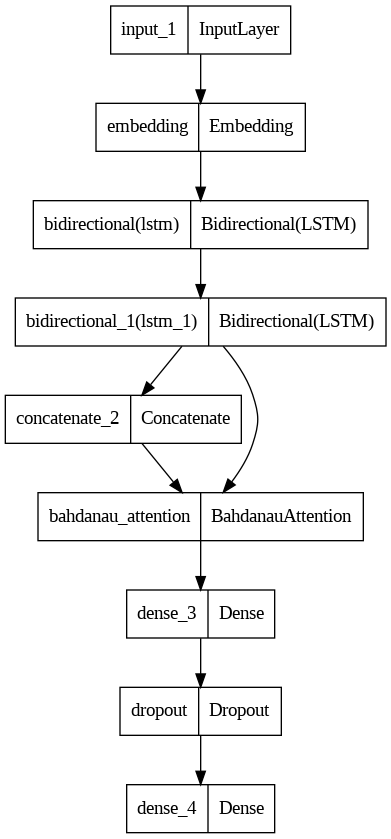

In [24]:
plot_model(model)

<br>

- 모델 적합

In [21]:
history = model.fit(X_train, y_train, epochs = 3, batch_size = 256, validation_data=(X_test, y_test), verbose=True)

Epoch 1/3
98/98 [==============================] - 1098s 11s/step - loss: 0.4577 - accuracy: 0.7772 - val_loss: 0.2912 - val_accuracy: 0.8797
Epoch 2/3
98/98 [==============================] - 1071s 11s/step - loss: 0.2473 - accuracy: 0.9132 - val_loss: 0.2867 - val_accuracy: 0.8802
Epoch 3/3
98/98 [==============================] - 1061s 11s/step - loss: 0.1900 - accuracy: 0.9367 - val_loss: 0.3412 - val_accuracy: 0.8786


In [22]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 271s 346ms/step - loss: 0.3412 - accuracy: 0.8786

 테스트 정확도: 0.8786
